In [4]:
!pip install PyWavelets

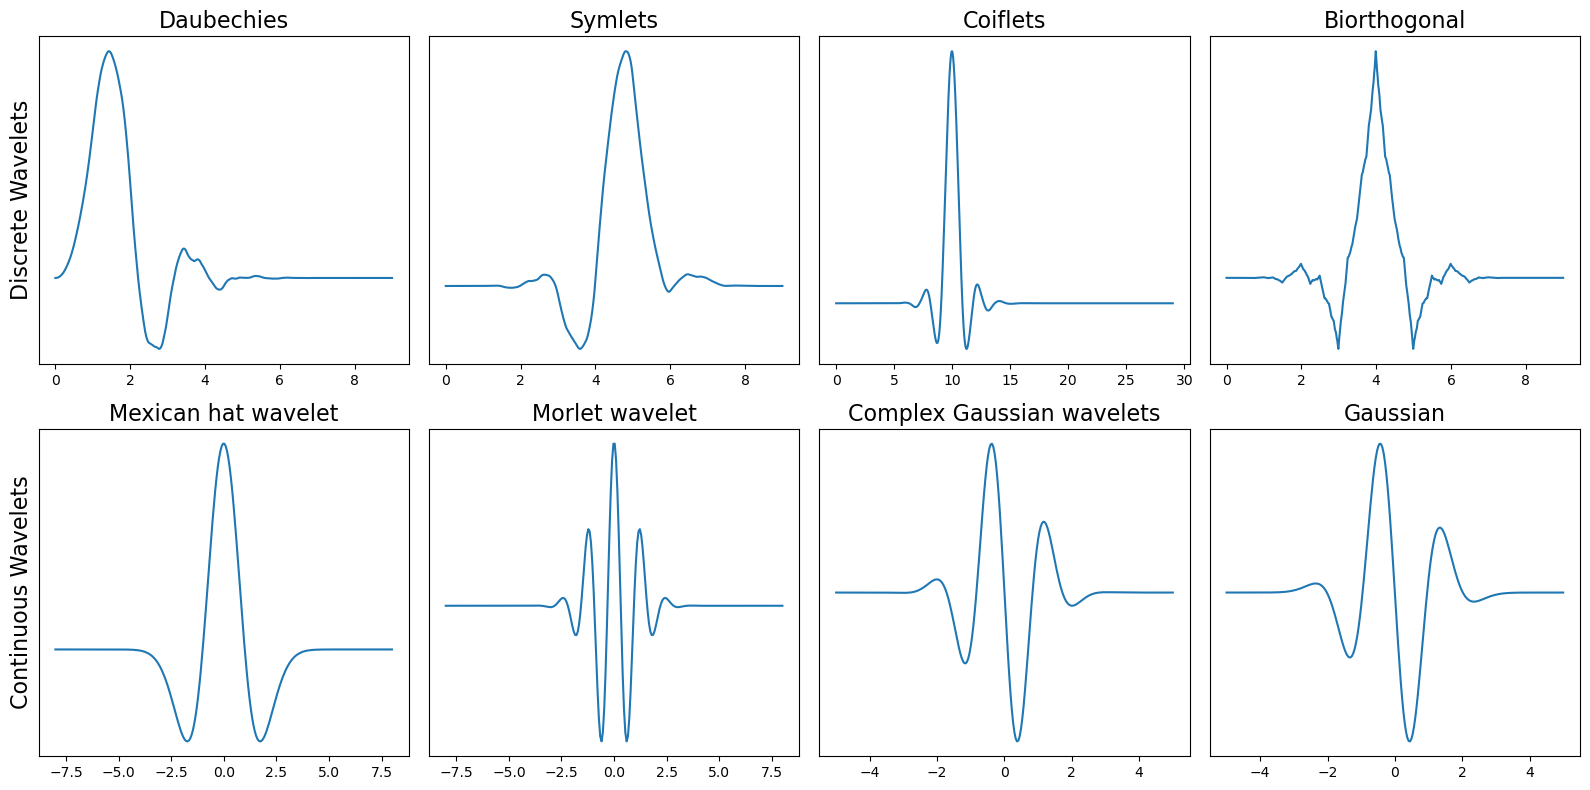

In [25]:

# source: https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
discrete_wavelets = ['db5', 'sym5', 'coif5',  'bior2.4'] #'haar',
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

In [5]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 1.7 MB/s eta 0:00:01


/Users/reza/anaconda3/lib/python3.10/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


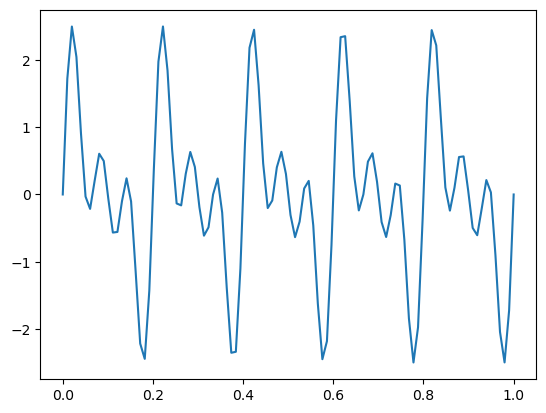

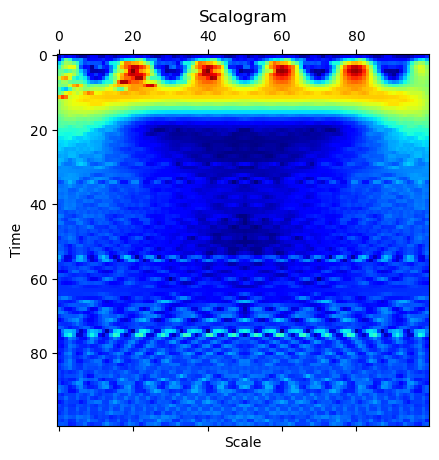

Bad pipe message: %s [b'*<\xb9W\x8d\xacT\xceS\\\xe5\xe4Fj\x05\x0cK\x87 48\xb8r\x96|g\xdcZ\xf4\xab\xca\xd8{\xcb\x13:\x12E\x7f\x0b\xba\xed\xf6\xe9\xdf\xf4\xf9\x83Yd\xbc\x00 ::\x13\x01\x13\x02\x13\x03\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\x13\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01\x93\xca\xca\x00\x00\x00\x12\x00\x00\x00#\x00\x00Di\x00\x05\x00\x03\x02h2\x00\x17\x00\x00\x00-\x00\x02\x01\x01\x00\r\x00\x12\x00\x10\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01\x003\x00+\x00)JJ\x00\x01\x00\x00\x1d\x00 \xc9\xe0\xd4\x99%\tQ\x9f\xc60\x84<\xd2\x1a\xf6#\xb9q\x88\xfb\x92w\xa0\x9e\\#\xdc\x05\xb3\xf1\xb4K\x00\x10\x00\x0e\x00\x0c\x02h2\x08http/1.1\x00+\x00\x07\x06\xca\xca\x03\x04\x03\x03\x00\n\x00']
Bad pipe message: %s [b'\x08JJ\x00\x1d\x00\x17\x00\x18']
Bad pipe message: %s [b'\x0b\x84\xb0A\xa1\x9f\x05\xbd\xc2\xe9\xccB\x7f\xfa/\xdd\xcb\xbc \xb7\xc5\xbf\x9d\x15\xcfOo%)\x0b\xea\xef\xa1{y_\xec.\x97\x0ee\xdc2\xf6\x1b\xa0\xd6\xb8\x1a\x87\xb3\x00 \xba\xba\x13\x01\x13\x02\x13\x03\x

In [1]:
#----- Making a Scalogram of Wavelets from a given signal. 
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Create a simple signal
t = np.linspace(0, 1, 100)
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 15 * t)

# Plot the original signal
plt.plot(t, x, label='Original signal')

# Apply a wavelet on the signal
scales = np.linspace(1, 100, 100)
coef, freqs = pywt.cwt(x, scales, 'cmor')

# # Plot the scalogram
plt.matshow(np.abs(coef), cmap='jet', aspect='auto')
plt.title('Scalogram')
plt.xlabel('Scale')
plt.ylabel('Time')

plt.show()

In [11]:
#------ SAX implementation ----------
#Source: https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_sax.html

import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

# Parameters
n_samples, n_timestamps = 100, 24

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)
print (X)
# SAX transformation
n_bins = 5
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)
print(X_sax)

[[-0.27071232  0.10484805  0.25052782 ... -1.37062377 -0.33010639
  -1.51528995]
 [ 1.20006019 -1.82261914  0.26938454 ...  0.05865553  1.60971428
   0.85990674]
 [-0.98520304 -0.95836832  0.44910865 ...  1.13510019  1.1659844
   0.04921449]
 ...
 [-1.97297522  2.61079616 -0.08101423 ... -0.54848489  0.68334528
  -0.794973  ]
 [ 0.62105122 -1.8263308  -0.60051152 ...  1.06806579 -0.83240635
  -1.29321114]
 [ 0.65175114  0.3648139   0.36465874 ... -0.24400286  0.66377744
   0.24035917]]
[['b' 'c' 'c' ... 'a' 'b' 'a']
 ['e' 'a' 'd' ... 'c' 'e' 'e']
 ['a' 'a' 'd' ... 'e' 'e' 'c']
 ...
 ['a' 'e' 'c' ... 'b' 'd' 'b']
 ['d' 'a' 'b' ... 'e' 'b' 'a']
 ['d' 'd' 'd' ... 'c' 'd' 'c']]


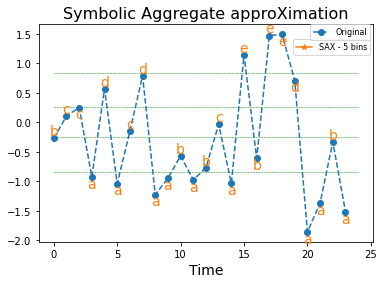

In [12]:

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(6, 4))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()

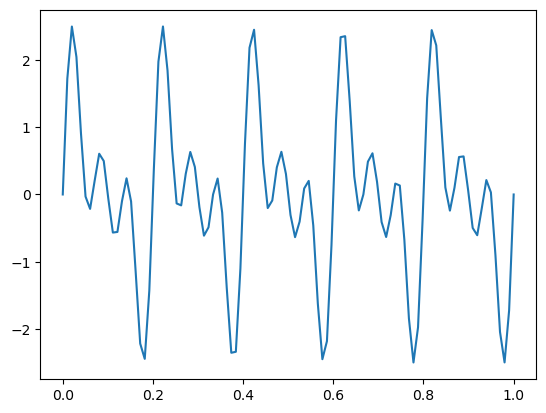

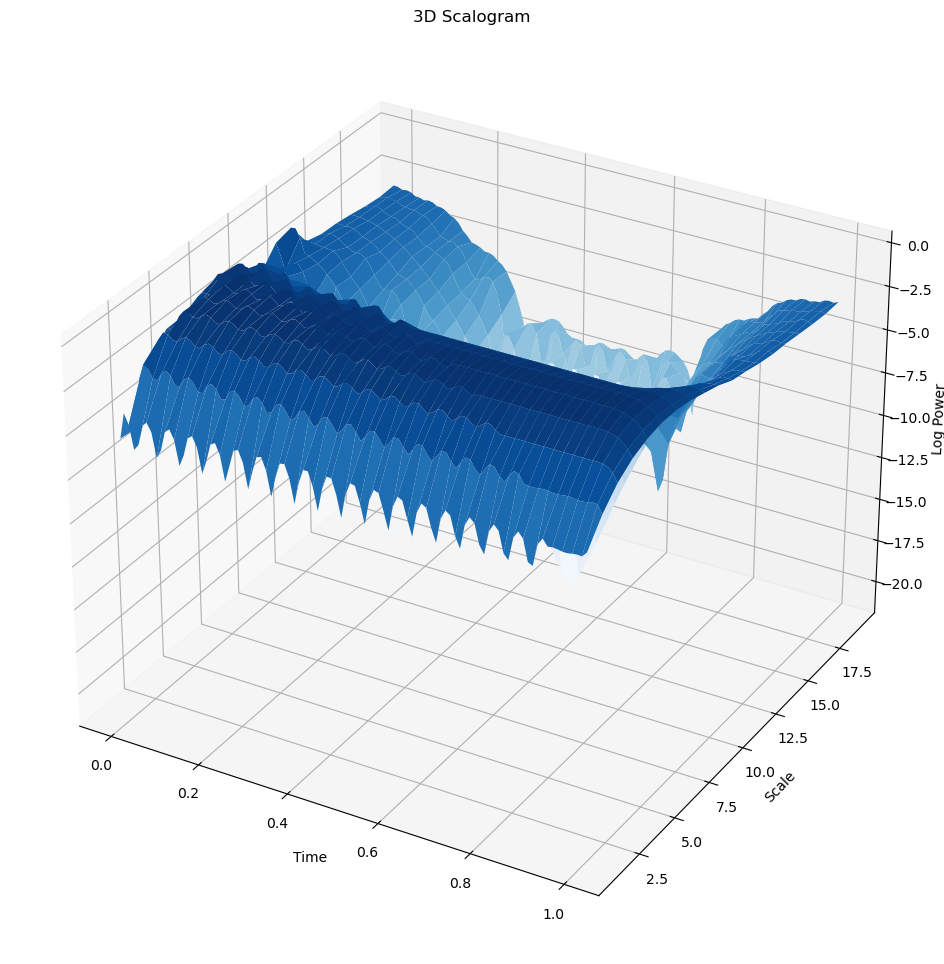

In [48]:
# ----- Wavelet and Scalogram Construction
import numpy as np
import matplotlib.pyplot as plt
import pywt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a simple signal
def create_signal(length=100, frequency=10):
    t = np.linspace(0, 1, length)
    signal = np.sin(2 * np.pi * frequency * t)
    plt.plot(t, x, label='Original signal')

    return t, signal

# Function to apply continuous wavelet transform and get scalogram
def compute_scalogram(signal, wavelet='cmor', scales=None):
    if scales is None:
        scales = np.arange(1,20)  # Adjust the range of scales as per your requirement. old-value: 128

    coeffs, frequencies = pywt.cwt(signal, scales, wavelet)
    power = np.abs(coeffs) ** 2
    scalogram = np.log(power)

    return frequencies, scalogram

# Main code
if __name__ == "__main__":
    # Generate the simple signal
    t, signal = create_signal()

    # Compute the scalogram using the continuous wavelet transform
    scales = np.arange(1, 20)
    frequencies, scalogram = compute_scalogram(signal, scales=scales)

    # Create 3D plot of the scalogram with small distance between time points
    t_step = t[1] - t[0]  # Calculate the time step between consecutive points
    T, S = np.meshgrid(np.arange(len(t)), scales)
    T = T * t_step  # Adjust the time points to introduce some space between them

    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, S, scalogram, cmap='Blues')

    # Customize the plot
    ax.set_title('3D Scalogram')
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')
    ax.set_zlabel('Amplitude')

    plt.show()



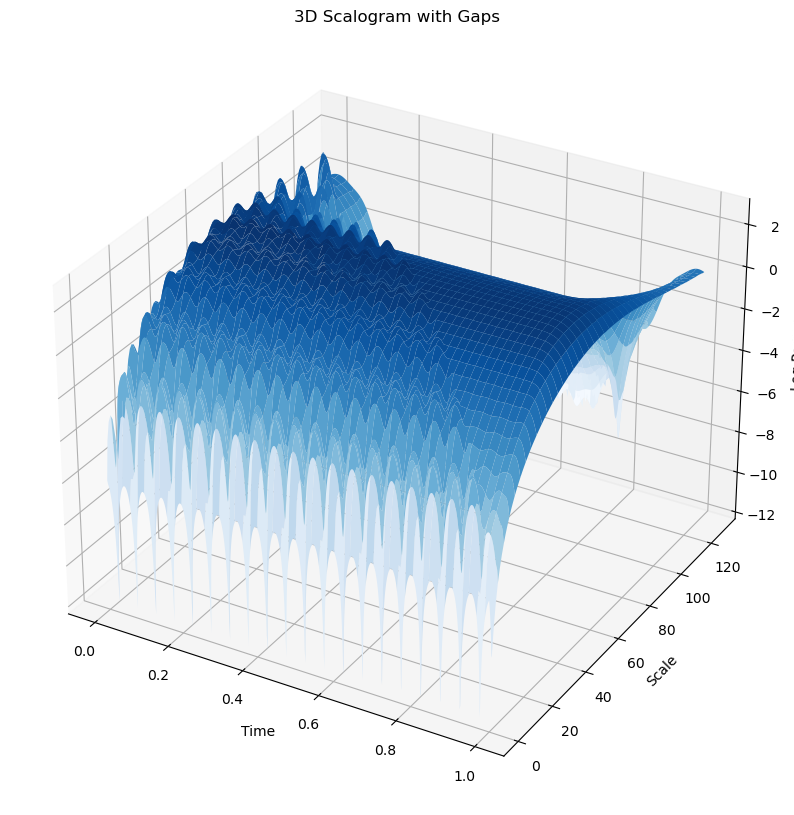

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a simple signal
def create_signal(length=1000, frequency=10):
    t = np.linspace(0, 1, length)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

# Function to apply continuous wavelet transform and get scalogram
def compute_scalogram(signal, wavelet='cmor', scales=None):
    if scales is None:
        scales = np.arange(1, 10)  # Adjust the range of scales as per your requirement

    coeffs, frequencies = pywt.cwt(signal, scales, wavelet)
    power = np.abs(coeffs) ** 2
    scalogram = np.log(power)

    return frequencies, scalogram

# Function to plot the 3D scalogram with gaps
def plot_3d_scalogram(t, scales, scalogram, gap_size):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i, scale in enumerate(scales):
        if i % gap_size == 0:
            ax.plot(t, np.ones_like(t) * scale, zs=scalogram[i], color='white', alpha=0.0)

    ax.plot_surface(T, S, scalogram, cmap='Blues')

    # Customize the plot
    ax.set_title('3D Scalogram with Gaps')
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')
    ax.set_zlabel('Log Power')

    plt.show()

# Main code
if __name__ == "__main__":
    # Generate the simple signal
    t, signal = create_signal()

    # Compute the scalogram using the continuous wavelet transform with gaps between scales
    gap_size = 10  # Adjust the size of the gap as per your requirement
    scales = np.arange(1, 128)

    frequencies, scalogram = compute_scalogram(signal, scales=scales)

    # Create 3D plot of the scalogram with gaps
    T, S = np.meshgrid(t, scales)

    plot_3d_scalogram(t, scales, scalogram, gap_size)
